Study Purpose: 

Screening for potential treatments to Squamous Cell Carcinoma (SCC) a commonly occuring form of skin cancer.

Study Details: 

Analysis of complete data set of animal study which reflects the treatment of variety of drug regimes over the course of 45 days in 250 mice. Physiological responses were monitored over the duration. The detailed analysis below provides insights into the how four(Capomulin, Infubinol, Ketapril and Placebo) specific treaments compared.  


Results: 

As demonstrated through the final analysis, Capomulin appears to be most effective treament.
Capomulin was the only treatment which reduced the size of the tumor.
Capomulin also increased the survival rates the most 
Capomulin also had the least Metastatic spread during treatment. 

Analysis and graphs provide details below.



In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# File to Load (Remember to Change These)
mouse_drug_data_to_load = ("./data/mouse_drug_data.csv")
clinical_trial_data_to_load = ("./data/clinicaltrial_data.csv")

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

# Merge our two data frames together
combined_data = pd.merge(ct_df, mouse_df, on="Mouse ID")

#ct_df.head()

# Display the data table for preview
combined_data  =  pd.DataFrame(combined_data)

combined_data.head()




,Mouse ID,Timepoint,Tumor_Volume_ (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 


tumor_mean = combined_data.groupby(["Drug","Timepoint"])["Tumor_Volume_ (mm3)"].mean()


# Convert to DataFrame

tumor_mean = tumor_mean.reset_index()

tumor_mean = pd.DataFrame(tumor_mean)

tumor_mean.head()

,Drug,Timepoint,Tumor_Volume_ (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = combined_data.groupby(["Drug","Timepoint"])["Tumor_Volume_ (mm3)"].sem()
tumor_sem = tumor_sem.reset_index()

# Convert to DataFrame
tumor_sem =pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem.head()
#tumor_sem



,Drug,Timepoint,Tumor_Volume_ (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
tumor_mean_pt = tumor_mean.pivot_table(index = "Timepoint",columns ="Drug",values ="Tumor_Volume_ (mm3)")

# Preview DataFrame

x = tumor_mean_pt
x.tail()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [7]:
tumor_mean_pt = tumor_mean_pt.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]
tumor_mean_pt.head()      

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


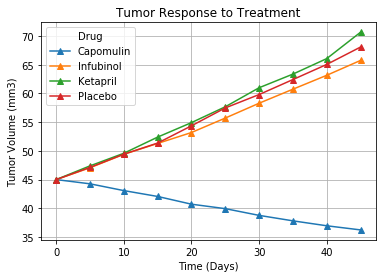

In [8]:
# Generate the Plot (with Error Bars)

# save the Figure 
tumor_mean_pt.plot(kind = 'line', title ='Tumor Response to Treatment', marker = '^')
plt.grid()
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Time (Days)")

plt.savefig('Tumor Response to Treatment')
plt.show()

 # Metastatic Response to Treatment

In [9]:
## Tumor Response to Treatment

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_mean = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()


# Convert to DataFrame

#meta_mean =meta_mean.reset_index()

meta_mean = pd.DataFrame(meta_mean)

meta_mean.head()


# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meta_sem = combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

#meta_sem = meta_sem.reset_index()

# Convert to DataFrame

# Preview DataFrame

# Convert to DataFrame
meta_sem =pd.DataFrame(meta_sem)

# Preview DataFrame
meta_sem.head()




Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_pt = meta_mean.pivot_table(index = "Timepoint",columns ="Drug",values ="Metastatic Sites")

# Preview DataFrame

meta_mean_pt.head()

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Selecting only required drugs for analysis 

meta_mean_pt = meta_mean_pt.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]
meta_mean_pt.head()  

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


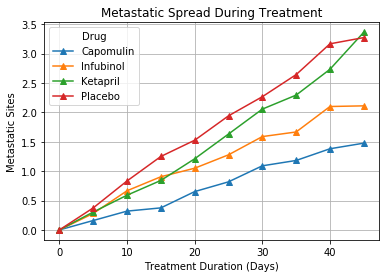

In [13]:
# Generate the Plot (with Error Bars)

# save the Figure 
meta_mean_pt.plot(kind = 'line', title ='Metastatic Spread During Treatment', marker = '^')
plt.grid()
plt.ylabel('Metastatic Sites')
plt.xlabel("Treatment Duration (Days)")

plt.savefig('Metastatic Spread During Treatment')
plt.show()

# Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()


# Convert to DataFrame

mice_count = mice_count.reset_index()

# Convert to DataFrame

mice_count = pd.DataFrame(mice_count)
mice_count = mice_count.rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame

mice_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_pt = mice_count.pivot_table(index = "Timepoint",columns ="Drug",values ="Mouse Count")

# Preview DataFrame

mice_count_pt.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
# Selecting only required drugs for analysis 

mice_count_pt = mice_count_pt.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]
mice_count_pt.head()  

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


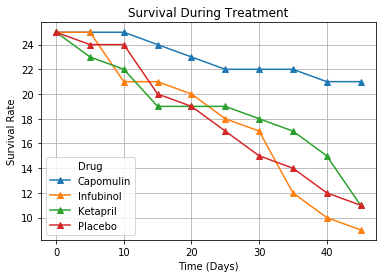

In [17]:
# Generate the Plot (with Error Bars)

# save the Figure 
mice_count_pt.plot(kind = 'line', title ='Survival During Treatment', marker = '^')
plt.grid()
plt.ylabel('Survival Rate')
plt.xlabel("Time (Days)")
plt.savefig('Survival During Treatment')
plt.show()



#Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


# Maximum change - difference between End tumor volume - value at day zero
# Note x = tumor_mean_pt (before selecting )

x_last = x.loc[45,:]
x_last = pd.DataFrame(x_last)
x_last = x_last.reset_index()
x_last

,Drug,45
0,Capomulin,36.236114
1,Ceftamin,64.132421
2,Infubinol,65.755562
3,Ketapril,70.662958
4,Naftisol,69.265506
5,Placebo,68.084082
6,Propriva,66.258529
7,Ramicane,34.955595
8,Stelasyn,68.438310
9,Zoniferol,65.960888


In [19]:
# Baseline - start tumor volume - value on day zero

x_begin = x.loc[0,:]
x_begin = pd.DataFrame(x_begin)

x_begin = x_begin.reset_index()
x_begin

,Drug,0
0,Capomulin,45.0
1,Ceftamin,45.0
2,Infubinol,45.0
3,Ketapril,45.0
4,Naftisol,45.0
5,Placebo,45.0
6,Propriva,45.0
7,Ramicane,45.0
8,Stelasyn,45.0
9,Zoniferol,45.0


In [20]:
combined_change = pd.merge(x_begin, x_last, on ='Drug')
#combined_change = combined_change.T
combined_change = combined_change.set_index('Drug')

combined_change

,0,45
Drug,,
Capomulin,45.0,36.236114
Ceftamin,45.0,64.132421
Infubinol,45.0,65.755562
Ketapril,45.0,70.662958
Naftisol,45.0,69.265506
Placebo,45.0,68.084082
Propriva,45.0,66.258529
Ramicane,45.0,34.955595
Stelasyn,45.0,68.438310


In [21]:
idx = pd.Index(['Start','End'])
combined_change.columns =idx
#idx.tolist()
combined_change.columns
combined_change

,Start,End
Drug,,
Capomulin,45.0,36.236114
Ceftamin,45.0,64.132421
Infubinol,45.0,65.755562
Ketapril,45.0,70.662958
Naftisol,45.0,69.265506
Placebo,45.0,68.084082
Propriva,45.0,66.258529
Ramicane,45.0,34.955595
Stelasyn,45.0,68.438310


In [22]:
#combinging columns and getting percent change 


cc = combined_change.diff(axis=1)

# Percentage change 
cc = (cc/45)*100
cc

,Start,End
Drug,,
Capomulin,NaN,-19.475303
Ceftamin,NaN,42.516492
Infubinol,NaN,46.123472
Ketapril,NaN,57.028795
Naftisol,NaN,53.923347
Placebo,NaN,51.297960
Propriva,NaN,47.241175
Ramicane,NaN,-22.320900
Stelasyn,NaN,52.085134


In [23]:
# Droping column 

cc_diff = cc.drop(['Start'],axis =1)
cc_diff

,End
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [24]:
# Selecting only required drugs for analysis 

cc_select = cc_diff.loc[['Capomulin','Infubinol','Ketapril','Placebo'],'End']
cc_select

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: End, dtype: float64

In [25]:
# Converting to DataFrame and reseting index 

cc_diff_pd = pd.DataFrame(cc_select)
cc_diff_pd = cc_diff_pd.reset_index()
cc_diff_pd 

,Drug,End
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [26]:
# Add a column with conditional check, to identify increase or decrease in volume

cc_diff_pd['positive change'] = np.where(cc_diff_pd['End']>0, 'true', 'false')

cc_diff_pd

,Drug,End,positive change
0,Capomulin,-19.475303,false
1,Infubinol,46.123472,true
2,Ketapril,57.028795,true
3,Placebo,51.297960,true


In [27]:
# converting to a list
cc_select_drug_change = cc_diff_pd['End'].tolist()
cc_select_drug = cc_diff_pd['Drug'].tolist()
y_values = cc_select_drug_change
x_names = cc_select_drug

In [28]:
y_values 

[-19.47530266666667, 46.123471728395046, 57.02879468484847, 51.297960484848495]

In [29]:
x_names


['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

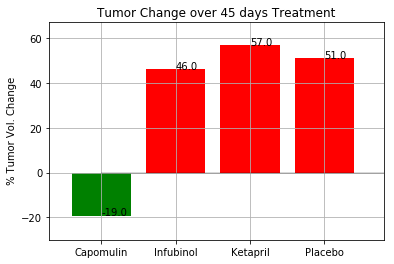

In [30]:
# Plot Graph displaying percent change for each of the Drug

#x_axis = np.arange(len(cc_diff_pd))
x_axis = np.arange(len(x_names))
tick_locations = []
for x in x_axis:
        tick_locations.append(x)

x_ticks = cc_diff_pd['Drug']
x_ticks_list = list(x_ticks)

plt.bar(x_names,cc_diff_pd["End"],color=cc_diff_pd['positive change'].map({'true':'r','false':'g'}))
plt.hlines(0,0,len(x_axis),alpha=0.2)
plt.title("Tumor Change over 45 days Treatment")
plt.xlim(-0.70, len(x_names)-.20)
plt.ylim(-30, max(y_values)+ 10)
plt.ylabel(' % Tumor Vol. Change')
plt.grid()
for a,b in zip(x_axis, round(cc_diff_pd["End"])):
    plt.text(a,b,str(b))
plt.savefig('Tumor Change over 45 Day Treatment')
plt.show()



In [31]:
# Function calls to be explored for formating  


marmosetsMeans = (20, 35, 30, 35, 27)
wombatsMeans = (25, 32, 34, 20, 25)

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1, ax)
#autolabel(rects2, ax)

